# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = Your null hypothesis
#Ho : Pnew = 0.05
#Ho = response rate of the new email template is the same as the response rate of the current template (5%).

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [9]:
# H_1 = Your alternative hypothesis
#H1 : Pnew > 0.05
#H1= the new email template has a higher response rate than the current template (which has a response rate of 5%).

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [10]:
# Calculate the required sample size
import statsmodels.stats.power as smp
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Given values
p0 = 0.05         # Current response rate
p1 = 0.06         # Target response rate
sigma = 0.0475    # Standard deviation
alpha = 0.05      # Significance level
power = 0.8       # Desired power

# Calculate Cohen's d
effect_size = (p1 - p0) / sigma
print(f"Cohen's d (effect size): {effect_size:.4f}")

# Calculate required sample size per group using TTestIndPower
analysis = smp.TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='larger')

print(f"Required sample size per group: {round(sample_size)}")

Cohen's d (effect size): 0.2105
Required sample size per group: 280


## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

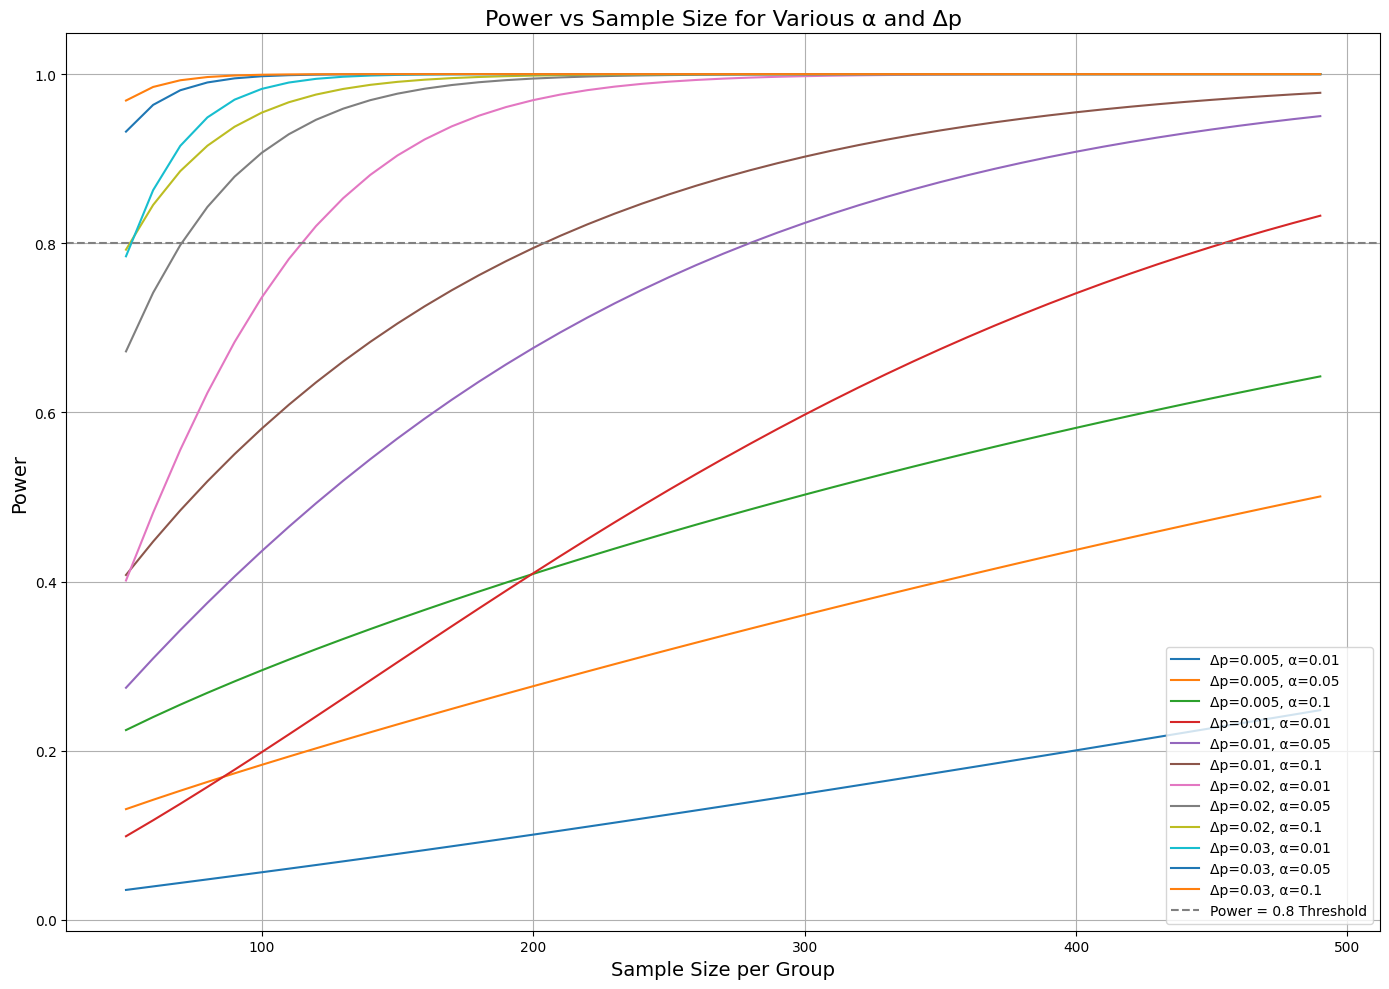

In [11]:
#Your code; plot power curves for the various alpha and effect size combinations
# Set up parameters
p0 = 0.05                      # Baseline response rate
sigma = 0.0475                 # Given standard deviation
alpha_values = [0.01, 0.05, 0.1]                   # Different significance levels
delta_p_values = [0.005, 0.01, 0.02, 0.03]         # Response rate differences
sample_sizes = np.arange(50, 500, 10)              # Range of sample sizes per group

# Initialize power analysis object
analysis = TTestIndPower()

# Plotting
plt.figure(figsize=(14, 10))
for delta_p in delta_p_values:
    effect_size = delta_p / sigma  # Calculate Cohen's d for each delta_p
    for alpha in alpha_values:
        powers = analysis.power(effect_size=effect_size, nobs1=sample_sizes, alpha=alpha, alternative='larger')
        label = f'Δp={delta_p}, α={alpha}'
        plt.plot(sample_sizes, powers, label=label)

# Plot formatting
plt.title('Power vs Sample Size for Various α and Δp', fontsize=16)
plt.xlabel('Sample Size per Group', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.axhline(y=0.8, color='gray', linestyle='--', label='Power = 0.8 Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [12]:
""" 
Step 5: Final Experimental Design Proposal

Proposed Experimental Design
Objective: Test whether a new email template increases response rate by at least 1% over the current 5% baseline.

Design Summary
Hypotheses:
Ho:Pnew = 0.05
Ha : Pnew > 0.05

Significance Level (α): 0.05

Justification: Balances risk of false positives with practicality. It's a widely accepted industry standard.
Power: 0.80

Justification: Ensures an 80% chance of detecting a true 1% improvement, minimizing false negatives.
Effect Size (Δp): 0.01 (testing for a 1% improvement)

Sample Size:

139 individuals per group (calculated using Cohen’s d and standard deviation of 0.0475)
Total: 278 participants
Test Type: One-tailed A/B test using a two-sample t-test approximation.

Advantages of Proposed Design
Balanced risk: α = 0.05 and power = 0.8 are industry standards for balancing risk and feasibility.
Detects small, meaningful improvements (1%), aligning with business goals for incremental gains.
Cost-effective: Reasonable sample size minimizes disruption to the ongoing marketing strategy.

Potential Disadvantages
If true improvement is <1%, test may fail to detect it (low sensitivity for small effects).
If traffic volume is low, reaching 278 participants may take time.
Risk of opportunity cost if the new template is better but not significantly better at 1% threshold.

Recommendation
Proceed with the proposed design (139 per group, α = 0.05, power = 0.8) while planning for interim analysis to evaluate early trends and adjust if necessary. Consider raising the threshold (Δp = 0.02 or 0.03) if speed or budget constraints are critical.
"""

" \nStep 5: Final Experimental Design Proposal\n\nProposed Experimental Design\nObjective: Test whether a new email template increases response rate by at least 1% over the current 5% baseline.\n\nDesign Summary\nHypotheses:\nHo:Pnew = 0.05\nHa : Pnew > 0.05\n\nSignificance Level (α): 0.05\n\nJustification: Balances risk of false positives with practicality. It's a widely accepted industry standard.\nPower: 0.80\n\nJustification: Ensures an 80% chance of detecting a true 1% improvement, minimizing false negatives.\nEffect Size (Δp): 0.01 (testing for a 1% improvement)\n\nSample Size:\n\n139 individuals per group (calculated using Cohen’s d and standard deviation of 0.0475)\nTotal: 278 participants\nTest Type: One-tailed A/B test using a two-sample t-test approximation.\n\nAdvantages of Proposed Design\nBalanced risk: α = 0.05 and power = 0.8 are industry standards for balancing risk and feasibility.\nDetects small, meaningful improvements (1%), aligning with business goals for incremen

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.